## VIDEO 1.3 - Solving our Problem using K-means Part 1

### To perform clustering using Kmeans you will be following these steps:

1) __Load the Dataset:__ Import the dataset into the Jupyter notebook environment.

2) __Feature Selection:__ Choose the features from the dataset that are relevant for the problem statement.

3) __Pre-process the data:__ Use appropriate pre-processing measures for the problem statement.

4) __Apply K-means Clustering:__ Use the k-means algorithm to cluster the data based on the different number of clusters.

5) __Find Optimal k:__ Find the optimal number of clusters using different methods and run the Kmeans algorithm with the desired number of clusters.

6) __Evaluate and Interpret the Clusters:__ Analyze and interpret the clusters by plotting different features with cluster labels.

### Import the necessary libraries 


In [1]:
import pandas as pd
import numpy as np

### Step 1: Load the dataset

In [2]:
data_preprocessed = pd.read_csv('data_preprocessed.csv')

In [3]:
data_preprocessed.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,SKU1539,2022-04-09,5835.0,46006,22.214389,2071,Skincare,99.0,72.0,194.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,SKU1431,2021-05-08,1881.0,8084,11.870778,681,Skincare,118.0,73.0,200.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,SKU995,2022-12-24,2477.0,24190,27.645714,875,Makeup,108.0,85.0,232.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,SKU1136,2022-10-08,4087.0,23588,16.896848,1396,Makeup,82.0,64.0,167.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,SKU528,2022-03-26,1446.0,13446,16.357664,822,Hair Care,29.0,24.0,88.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


### Step 2: Processing and feature selection for clustering

In [4]:
data_preprocessed.sort_values(by=['SKU_ID', 'Date'], inplace=True)
data_preprocessed

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
5329,SKU1011,2021-01-02,4119.0,4650,6.671449,697,Makeup,29.0,21.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12554,SKU1011,2021-01-09,4074.0,11435,11.134372,1027,Makeup,36.0,28.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11735,SKU1011,2021-01-16,4897.0,11603,11.189007,1037,Makeup,38.0,30.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13366,SKU1011,2021-01-23,4783.0,14067,11.880912,1184,Makeup,38.0,30.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26,SKU1011,2021-01-30,3789.0,6188,7.063927,876,Makeup,38.0,30.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,SKU998,2022-12-03,3206.0,32011,17.247306,1856,Makeup,79.0,56.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14059,SKU998,2022-12-10,1670.0,29417,17.083043,1722,Makeup,79.0,56.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7879,SKU998,2022-12-17,1554.0,19292,13.919192,1386,Makeup,79.0,56.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18135,SKU998,2022-12-24,1117.0,22950,17.887763,1283,Makeup,79.0,56.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
data_preprocessed.columns.tolist()

['SKU_ID',
 'Date',
 'Page_traffic',
 'Revenue($)',
 'Unit_price',
 'Units_sold',
 'Segment',
 '1_Star_Rating',
 '2_Star_Rating',
 '3_Star_Rating',
 '4_Star_Rating',
 '5_Star_Rating',
 'Image_Count',
 'Bullet_Count',
 'Title_Count',
 'Description_Length',
 'num_unique_Search_Terms',
 'Organic Search Rank',
 'Num_of_Promotions',
 'Sum of Spend',
 'Online_Clicks',
 'Online_Cost',
 'Online_Impressions',
 'num_unique_campaigns',
 'Clicks_video',
 'Cost_video',
 'Impressions_video',
 'num_unique_campaigns_offline',
 'Units_sold>1000']

### Create an aggregated dataset - Select the relevant features and group them by SKU_ID

In [6]:
# Define the aggregation operations
aggregation = {
    
    'Page_traffic':'last',
    'Organic Search Rank': 'last',
    'Image_Count': 'last',
    'Bullet_Count': 'last',
    'Title_Count': 'last',
    'Description_Length': 'last',
     '1_Star_Rating': 'last',
     '2_Star_Rating': 'last',
     '3_Star_Rating': 'last',
     '4_Star_Rating': 'last',
     '5_Star_Rating': 'last',  
    'Unit_price':'last',
    'Revenue($)': 'sum',
}

In [7]:
# Group by 'SKU_ID' and aggregate
# data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation).reset_index()
data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation)
data_selected

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,4995.0,14.0,5.0,5.0,91.0,59.0,75.0,50.0,118.0,237.0,1672.0,18.095471,1805434
SKU1014,87.0,32.0,0.0,5.0,79.0,99.0,89.0,49.0,146.0,257.0,1651.0,20.099526,0
SKU1024,5454.0,30.0,0.0,8.0,163.0,158.0,106.0,66.0,205.0,440.0,2996.0,15.980161,2340227
SKU1025,5356.0,27.0,2.0,6.0,90.0,62.0,152.0,102.0,287.0,604.0,4098.0,19.634593,2432316
SKU1036,3627.0,24.0,12.0,8.0,126.0,221.0,140.0,78.0,228.0,474.0,3479.0,25.186318,2839170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU968,875.0,19.0,9.0,5.0,85.0,56.0,57.0,39.0,116.0,273.0,1803.0,20.905660,0
SKU978,6056.0,30.0,0.0,8.0,167.0,158.0,14.0,9.0,0.0,74.0,533.0,18.176868,2211515
SKU989,583.0,28.0,13.0,6.0,62.0,122.0,162.0,107.0,277.0,571.0,3809.0,20.905660,0


### Check for missing values

In [8]:
# Identify missing values in data_selected
data_selected.isnull().sum()

Page_traffic           0
Organic Search Rank    0
Image_Count            0
Bullet_Count           0
Title_Count            0
Description_Length     0
1_Star_Rating          0
2_Star_Rating          0
3_Star_Rating          0
4_Star_Rating          0
5_Star_Rating          0
Unit_price             0
Revenue($)             0
dtype: int64

### Step 3: Scaling the data to normalize the features

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Create a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=data_selected.columns, index = data_selected.index)

# Show the first few rows of the scaled DataFrame
data_scaled.head()


,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,1.100784,-0.411851,-0.411446,-1.576290,-0.551930,-1.284448,-0.209573,-0.229204,-0.389066,-0.409205,-0.320630,-0.627850,-0.062109
SKU1014,-1.351049,1.041026,-1.427309,-1.576290,-0.962336,-0.632472,0.013749,-0.252124,-0.162427,-0.330060,-0.333027,-0.398543,-1.624228
SKU1024,1.330081,0.879595,-1.427309,1.486582,1.910506,0.329194,0.284926,0.137522,0.315134,0.394121,0.460978,-0.869888,0.400611
SKU1025,1.281125,0.637449,-1.020964,-0.555332,-0.586131,-1.235550,1.018701,0.962656,0.978863,1.043114,1.111530,-0.451741,0.480290
SKU1036,0.417388,0.395303,1.010763,1.486582,0.645087,1.356056,0.827281,0.412567,0.501302,0.528668,0.746111,0.183498,0.832313


## VIDEO 1.4 - Solving our Problem using K-means Part 2

__Let’s quickly run all the code above up to this point.__

### Step 4: Apply Kmeans Clustering 

In [10]:
from sklearn.cluster import KMeans

# Fit KMeans with its default number of clusters
kmeans = KMeans(random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)
data_visual = data_scaled.copy()
data_visual['Cluster_Labels'] = cluster_labels
data_visual.head()

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($),Cluster_Labels
SKU_ID,,,,,,,,,,,,,,
SKU1011,1.100784,-0.411851,-0.411446,-1.576290,-0.551930,-1.284448,-0.209573,-0.229204,-0.389066,-0.409205,-0.320630,-0.627850,-0.062109,1
SKU1014,-1.351049,1.041026,-1.427309,-1.576290,-0.962336,-0.632472,0.013749,-0.252124,-0.162427,-0.330060,-0.333027,-0.398543,-1.624228,7
SKU1024,1.330081,0.879595,-1.427309,1.486582,1.910506,0.329194,0.284926,0.137522,0.315134,0.394121,0.460978,-0.869888,0.400611,0
SKU1025,1.281125,0.637449,-1.020964,-0.555332,-0.586131,-1.235550,1.018701,0.962656,0.978863,1.043114,1.111530,-0.451741,0.480290,1
SKU1036,0.417388,0.395303,1.010763,1.486582,0.645087,1.356056,0.827281,0.412567,0.501302,0.528668,0.746111,0.183498,0.832313,0


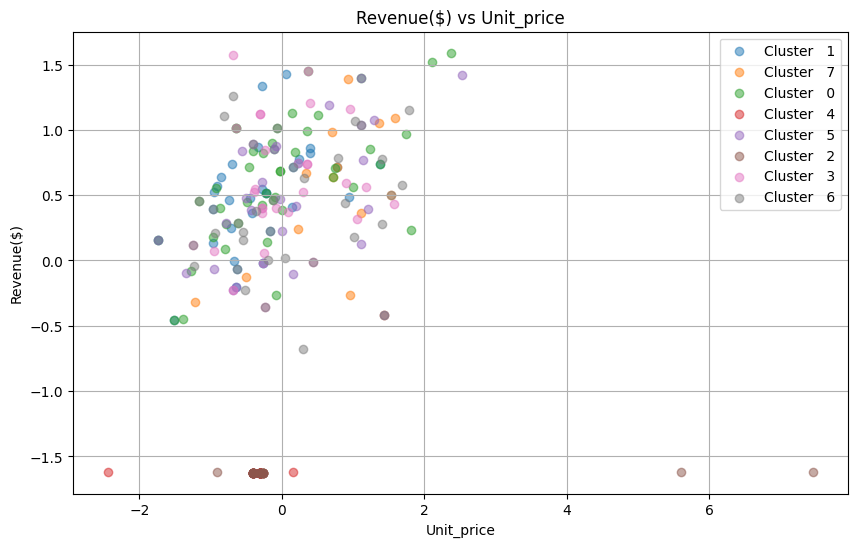

In [11]:
import matplotlib.pyplot as plt
# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))

#Cluster_label is the variable that will take on the value of each unique cluster label as the for loop iterates.
for cluster_label in data_visual['Cluster_Labels'].unique():  
#This DataFrame is a subset of data_visual where 'Cluster_Labels' is equal to the current value of cluster_label being processed in the loop.
    cluster_data = data_visual[data_visual['Cluster_Labels'] == cluster_label]
#This line plots a scatter plot using matplotlib.pyplot (abbreviated as plt)    
    plt.scatter(cluster_data['Unit_price'], cluster_data['Revenue($)'], label=f'Cluster   {cluster_label}', alpha=0.5)

plt.xlabel('Unit_price')
plt.ylabel('Revenue($)')
plt.title('Revenue($) vs Unit_price')
plt.legend()
plt.grid(True)
plt.show()  


In [12]:
# Fit KMeans with  clusters
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

data_visual['Cluster_Labels'] = cluster_labels

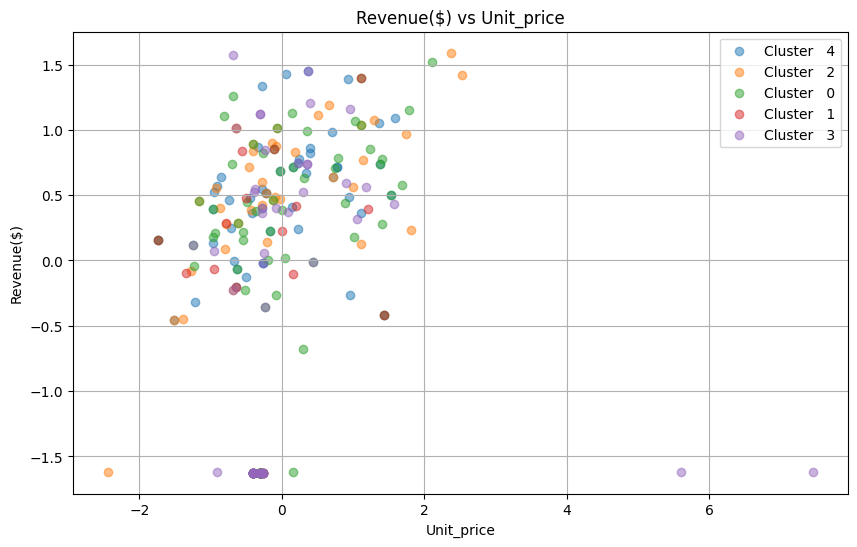

In [13]:
# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))

for cluster_label in data_visual['Cluster_Labels'].unique():  
    cluster_data = data_visual[data_visual['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['Unit_price'], cluster_data['Revenue($)'], label=f'Cluster   {cluster_label}', alpha=0.5)


plt.xlabel('Unit_price')
plt.ylabel('Revenue($)')
plt.title('Revenue($) vs Unit_price')
plt.legend()
plt.grid(True)
plt.show()  # Add this line to display the plot


## Video 1.5 - Finding the Optimal number of Clusters (K)

### Step 5: Plot the elbow plot to find optimal K value

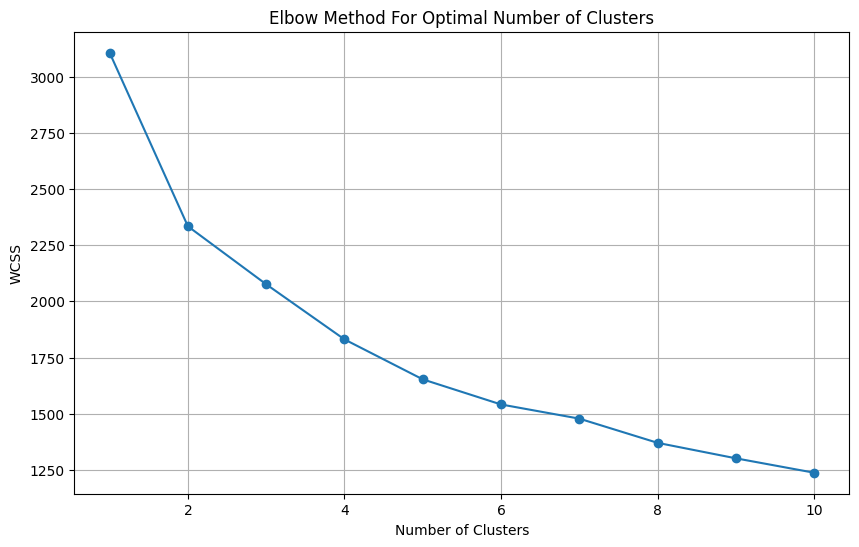

In [14]:
# Define a range of cluster counts to test
cluster_range = range(1, 11)  # You can adjust the upper limit as needed

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

# KMeans for each cluster count and store WCSS
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Define a range of cluster counts to test
cluster_range = range(2, 10)  # Start from 2 clusters

# Initialize variables for silhouette scores
silhouette_scores = []

# Silhouette score for each cluster count
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    print(i,labels)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Print Silhouette scores
for i, score in zip(cluster_range, silhouette_scores):
    print(f'Number of Clusters: {i}, Silhouette Score: {score}')


2 [1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1]
3 [0 0 2 1 2 2 1 0 1 2 0 1 1 0 0 0 2 2 1 0 2 1 1 2 2 0 0 1 2 0 1 0 1 0 2 1 2
 1 2 1 2 2 0 0 2 0 1 2 0 2 2 2 0 1 1 1 0 2 0 2 1 2 2 2 2 1 1 2 1 2 2 2 2 0
 2 0 2 2 0 0 1 0 0 0 0 1 2 2 0 2 2 2 0 0 1 2 0 2 0 0 0 2 2 2 2 1 2 0 2 0 2
 1 2 0 2 2 2 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 2 2 2 1 0 2 1 2 2 1 1 0 2 1 2
 2 1 1 2 2 2 1 2 2 2 2 2 1 0 0 1 0 2 0 0 0 1 0 2 2 1 1 0 0 1 0 2 0 2 1 0 0
 1 1 0 0 0 2 0 0 0 2 1 1 0 1 0 0 2 1 1 0 0 0 0 2 0 2 1 2 0 1 0 2 0 2 2 0 0
 0 2 0 1 0 0 0 2 0 0 2 0 0 2 1 2 2]
4 [2 2 3 2 3 3 2 2 2 3 2

### Cluster the data using K-means algorithm

In [17]:
# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

data_visual['Cluster_Labels'] = cluster_labels

## Video 1.6 - Analysis and Insights Based on the Plots

### Step 6: Evaluate and Interpret the Clusters

#### Unit_price v/s Revenue

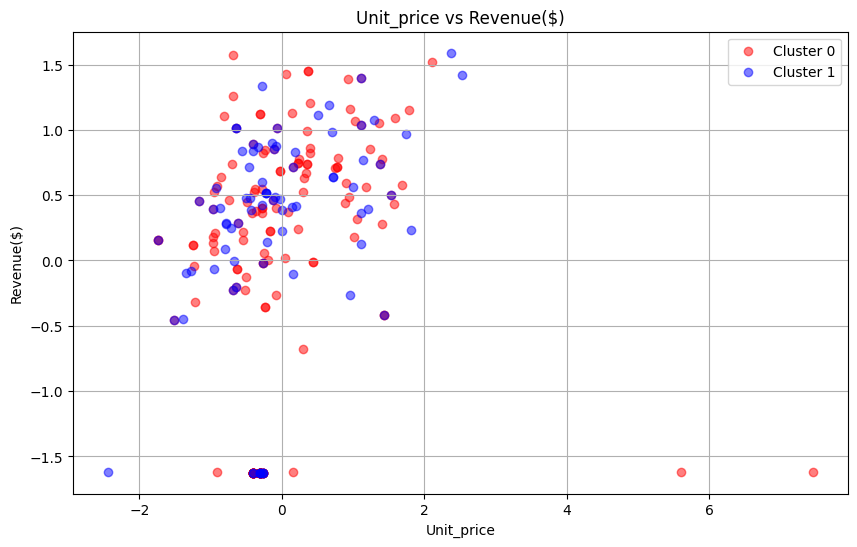

In [18]:
# Create a list of colors for each cluster
colors = ['red', 'blue']

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))

for cluster_label, color in enumerate(colors):
    cluster_data = data_visual[data_visual['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['Unit_price'], cluster_data['Revenue($)'], label=f'Cluster {cluster_label}', color=color, alpha=0.5)

plt.xlabel('Unit_price')
plt.ylabel('Revenue($)')
plt.title('Unit_price vs Revenue($)')
plt.legend()
plt.grid(True)
plt.show()


#### Title count v/s Revenue

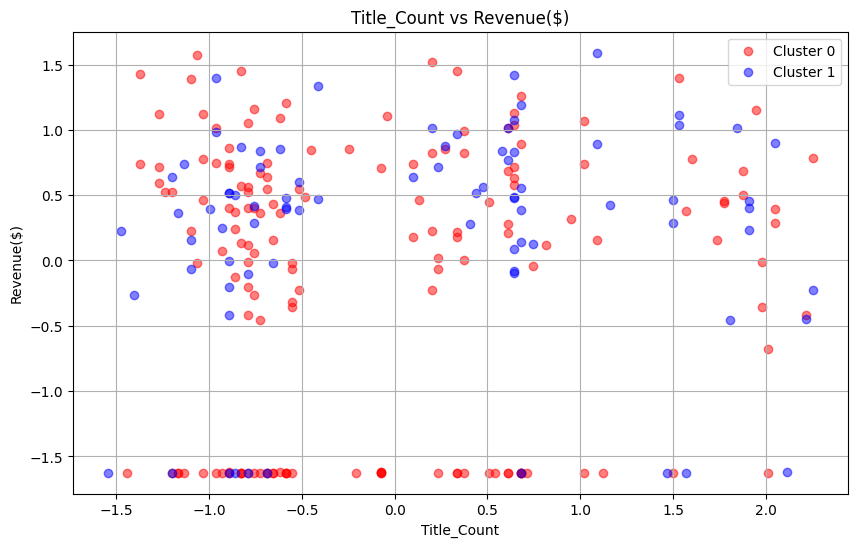

In [20]:
# Create a list of colors for each cluster
colors = ['red', 'blue']

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))

for cluster_label, color in enumerate(colors):
    cluster_data = data_visual[data_visual['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['Title_Count'], cluster_data['Revenue($)'], label=f'Cluster {cluster_label}', color=color, alpha=0.5)

plt.xlabel('Title_Count')
plt.ylabel('Revenue($)')
plt.title('Title_Count vs Revenue($)')
plt.legend()
plt.grid(True)
plt.show()


#### Page Traffic v/s Revenue

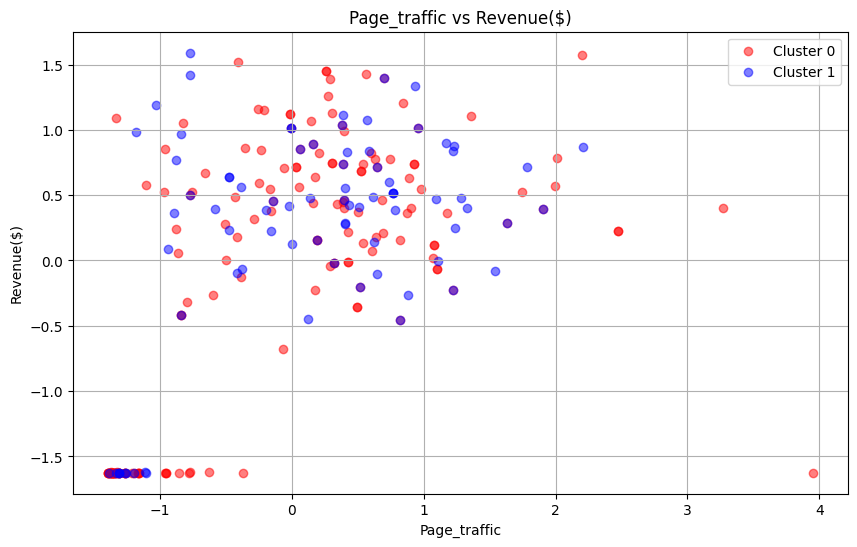

In [21]:
# Create a list of colors for each cluster
colors = ['red', 'blue']

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))

for cluster_label, color in enumerate(colors):
    cluster_data = data_visual[data_visual['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_data['Page_traffic'], cluster_data['Revenue($)'], label=f'Cluster {cluster_label}', color=color, alpha=0.5)

plt.xlabel('Page_traffic')
plt.ylabel('Revenue($)')
plt.title('Page_traffic vs Revenue($)')
plt.legend()
plt.grid(True)
plt.show()
